CMSC 320 Final Project
By Christian Pawlowski
                                              
Video games have been a staple point for millions or even billions of people in their quest for entertainment. The growing popularity of video games has only increased year after year. A billion dollar industry that has made video game devolpers richer than they could have ever imagined. It was once an induistry that struggled to stay afloat but in modern day it has become an economic powerhouse. From indie game developers to triple A game devolopers there has always been a money hunger aspiration to find what exactly makes a successful game and the patterns to optimize the greatest revenue profit for their company. As always games aren't always perfect and they sometimes aren't as successful as a game developer would hope as we seen with games like Fallout 76.  

Purpose:
To get a better understanding of what factors contribute to a video game’s overall sales number and in turn, this will help video game developers to predict if their game could be successful or not.


Data Collection:
For our analysis we will be using the data from https://www.kaggle.com/datasets/thedevastator/discovering-hidden-trends-in-global-video-games which provides us with 1,906 rows which also includes 13 columns. Each row contains these columns (Rank, Game Title, Platform, Year, Genre, Publisher, North America, Europe, Japan, Rest of World, Global, and Review). These columns provide us specific data for each game and educates us on how successful each game is. Unfortunately, there are missing data point in this dataset which will have to be filled before any analysis can take place. This dataset was created by Andy Bramwell who has made other datatsets for many other topics so go to https://data.world/bramwax if you want to check out more of his stuff.

In [126]:
#Import the necessary functions needed for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# machine learning and filling in missing data
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# hypothesis testing
import statsmodels.formula.api as smf

Read Dataset and Curate It To Be a Reliable Dataset:
This will have us import the dataset we want to use such as a CSV file and turn that into a pandas dataframe. This will help us with being able to analyze such data. We will also have to fill in the missing values in the dataframe so there isn't any issues when comparing data. 


In [127]:
#Import dataset using pandas read_csv function
videoGames = pd.read_csv("Video Games Sales.csv")
#Drop any columns we don't need
videoGames = videoGames.drop(['index'], axis = 1)
videoGames.head()

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [128]:
#Check to see if there are any missing values
videoGames.isnull().sum()

Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

As we can see there is some missing data in the dataset. It mostly is in the Year column where there is a total of 29 missing data points but there are also 2 missing data points in the Publisher column. For the Year column we will be using the mean year of the column since it would be rather difficult to look up the correct year for each of the 29 missing values. Using the mean allows us to not unbalance the data and not bring in any bias. For the Publisher missing values since there are only 2 missing we will specifically look up these games and update the column with their correct publisher.

In [129]:
#Set null sum to variable
isNull = videoGames.isnull().sum()

#Fill up Year column
videoGames['Year'] = videoGames['Year'].fillna(videoGames['Year'].mean())

#Check to see if we filled the missing values correctly
videoGames.isnull().sum()

Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        2
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [130]:
#Find the index of the missing values in Publisher
videoGames[videoGames['Publisher'].isnull()].index.tolist()

[373, 1016]

In [131]:
#Find what the games are missing a publisher in Publisher [373, 1016]
print(videoGames.loc[373],"\n")
print(videoGames.loc[1016])

#Update missing values with the correct publisher
videoGames.at[373,'Publisher'] = 'THQ'
videoGames.at[1016, 'Publisher'] = 'EA Sports'

#Check to see if we filled in the missing publishers correctly
videoGames.isnull().sum()

Rank                                    374
Game Title       wwe Smackdown vs. Raw 2006
Platform                                PS2
Year                            2003.766773
Genre                              Fighting
Publisher                               NaN
North America                          1.57
Europe                                 1.02
Japan                                   0.0
Rest of World                          0.41
Global                                  3.0
Review                                 91.0
Name: 373, dtype: object 

Rank                       1017
Game Title       Triple Play 99
Platform                     PS
Year                2003.766773
Genre                    Sports
Publisher                   NaN
North America              0.81
Europe                     0.55
Japan                       0.0
Rest of World               0.1
Global                     1.46
Review                    69.72
Name: 1016, dtype: object


Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

Data Analysis:

We will look at different features and break down data to see what are some factors that play a role in sales and which factors should be focused more on depending on the different regions. Producing the graphs for these different scenarios will allow us to get a closer look at what gamers look for in their video games. 

<Axes: title={'center': 'Popularity for each Platform (World Wide)'}, xlabel='Platforms', ylabel='Appearance Count'>

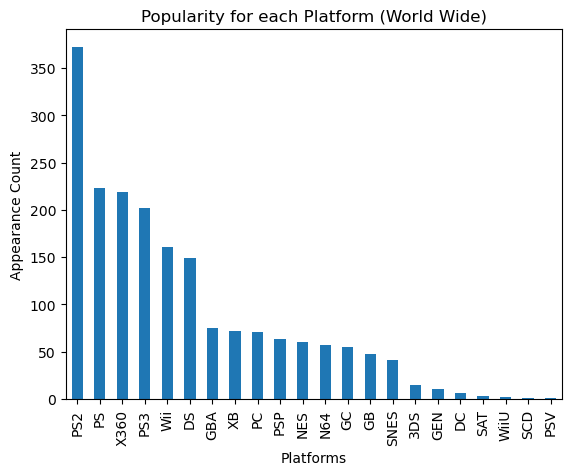

In [132]:
#Create Graph for most popular gaming system
videoGames['Platform'].value_counts().plot(kind='bar', title = 'Popularity for each Platform (World Wide)', xlabel = 'Platforms', ylabel = 'Appearance Count')

From the bar graph we can see that the ps2(PlayStation 2) was the most popular console in this dataset where it blew out the competition by a wide margin. We also see that the ps(PlayStation), x360(Xbox 360), ps3(PlayStation 3), and the Wii fills out the top 5 most popular platforms amongst users. We can use this data to see which platform gamers sway towards when playing their video games and see a potential trend on which company that makes the most popular platforms consistently and video game companies/developers use this to focus the platforms that company makes in the future. So since the PlayStation, PlayStation 2, and PlayStation 3 were all in the top 5 most popular then video game companies should focus on making games for Sony, the Creator of the PlayStations, and their future consoles.

<Axes: title={'center': 'Most Popular Platforms (North America)'}, xlabel='Video Game Platforms', ylabel='Popularity'>

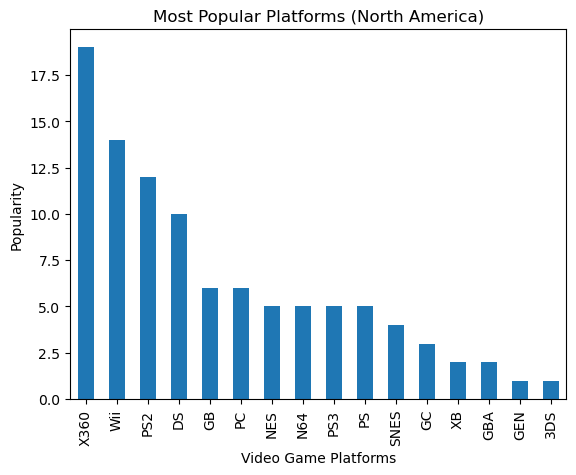

In [133]:
#North America Platform Popularity
na = videoGames.sort_values('North America', ascending = False)

#Cut down values to just the top 100 best selling games in North America
na = na.head(100)

#Plot graph for best selling platforms in North America
na['Platform'].value_counts().plot(kind = 'bar', title = 'Most Popular Platforms (North America)', xlabel = 'Video Game Platforms', ylabel = 'Popularity')

<Axes: title={'center': 'Most Popular Platforms (Japan)'}, xlabel='Video Game Platforms', ylabel='Popularity'>

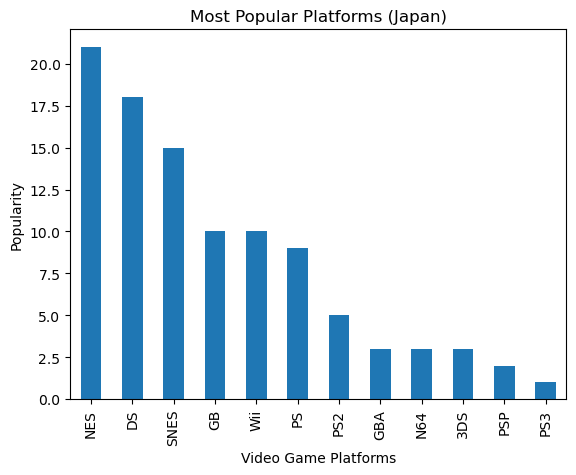

In [134]:
#Japan Platform Popularity
ja = videoGames.sort_values('Japan', ascending = False)

#Cut down values to just the top 100 best selling games in Japan
ja = ja.head(100)

#Plot graph for best selling platforms in Japan
ja['Platform'].value_counts().plot(kind = 'bar', title = 'Most Popular Platforms (Japan)', xlabel = 'Video Game Platforms', ylabel = 'Popularity')

<Axes: title={'center': 'Most Popular Platforms (Europe)'}, xlabel='Video Game Platforms', ylabel='Popularity'>

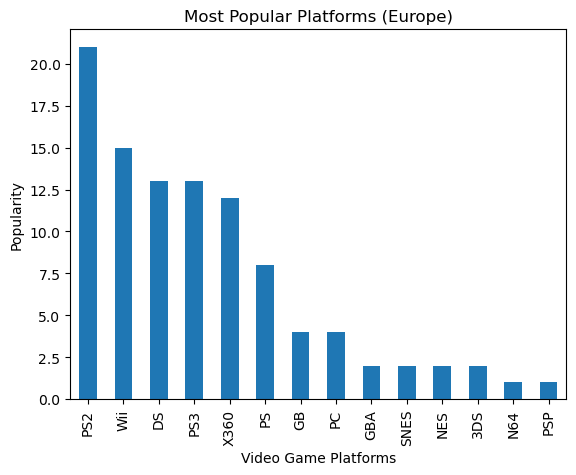

In [135]:
#Europe Platform Popularity
eu = videoGames.sort_values('Europe', ascending = False)

#Cut down values to just the top 100 best selling games in Europe
eu = eu.head(100)

#Plot graph for best selling platforms in Europe
eu['Platform'].value_counts().plot(kind = 'bar', title = 'Most Popular Platforms (Europe)', xlabel = 'Video Game Platforms', ylabel = 'Popularity')

<Axes: title={'center': 'Most Popular Platforms (Rest of World)'}, xlabel='Video Game Platforms', ylabel='Popularity'>

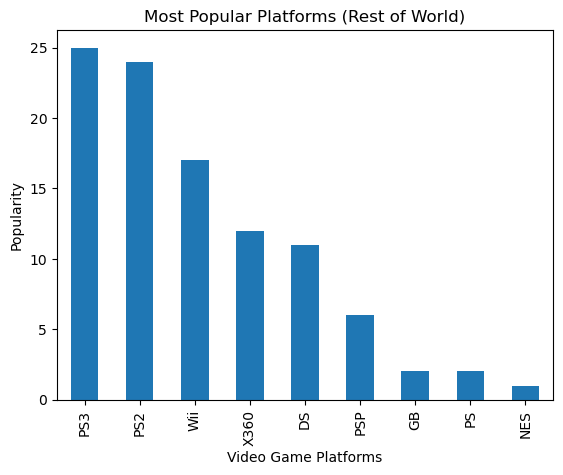

In [136]:
#Rest of World Platform Popularity
row = videoGames.sort_values('Rest of World', ascending = False)

#Cut down values to just the top 100 best selling games in Rest of World
row = row.head(100)

#Plot graph for best selling platforms in Rest of World
row['Platform'].value_counts().plot(kind = 'bar', title = 'Most Popular Platforms (Rest of World)', xlabel = 'Video Game Platforms', ylabel = 'Popularity')

From the data we can see that each region has different platforms that are the most popular. For example, in North America the Xbox 360 is the most popular platform while in the Rest of World region we see that the PlayStation 2 and PlayStation 3 are significantly more popular than every other platform especially the Xbox 360.

<Axes: title={'center': 'Popularity for each Platform (World Wide)'}, xlabel='Platforms', ylabel='Appearance Count'>

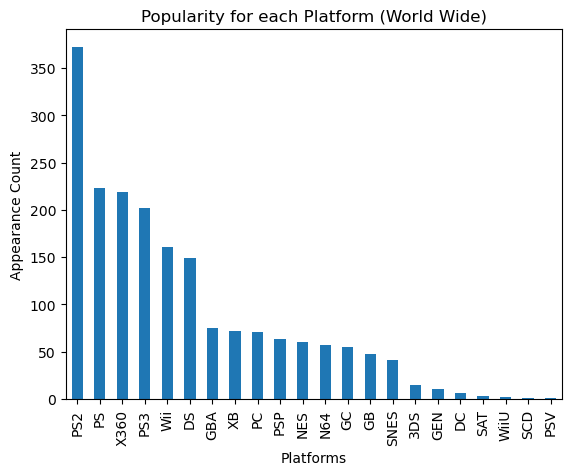

In [137]:
#Look at Most popular genre for North America, Japan, Rest of World, Europe, and World Wide
videoGames['Platform'].value_counts().plot(kind = 'bar', title = 'Popularity for each Platform (World Wide)', xlabel = 'Platforms', ylabel = 'Appearance Count')

Looking at the video game genres world wide we can see that sports games leads the list in popularity with action games coming in at a close second. This would infer that if you want to make a successful video game you would want to aim at the sports and action genres as those are the most played type of games in the world. However, this could change depending on which region you are in as each regions might have a different taste from one another. 

<Axes: title={'center': 'Most Popular Game Genres (North America)'}, xlabel='Video Game Genres', ylabel='Popularity'>

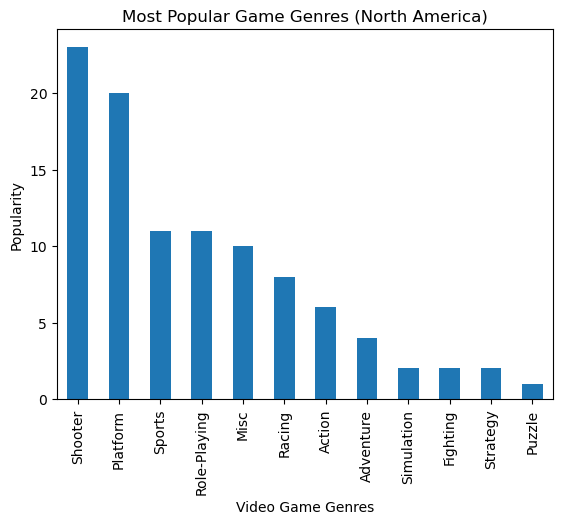

In [138]:
#North America Genre Popularity
na = videoGames.sort_values('North America', ascending = False)

#Cut down values to just the top 100 best selling games in North America
na = na.head(100)

#Plot graph for best selling genres in North America
na['Genre'].value_counts().plot(kind='bar', title = 'Most Popular Game Genres (North America)', xlabel = 'Video Game Genres', ylabel = 'Popularity')

<Axes: title={'center': 'Most Popular Game Genres (Japan)'}, xlabel='Video Game Genres', ylabel='Popularity'>

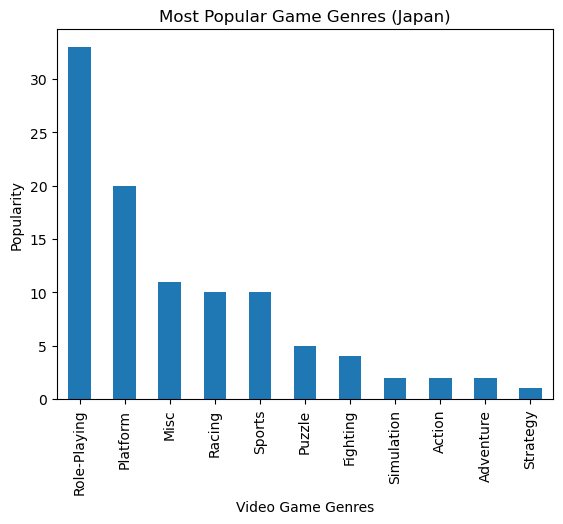

In [139]:
#Japan Genre Popularity
ja = videoGames.sort_values('Japan', ascending = False)

#Cut down values to just the top 100 best selling games in Japan
ja = ja.head(100)

#Plot graph for best selling genres in Japan
ja['Genre'].value_counts().plot(kind='bar', title = 'Most Popular Game Genres (Japan)', xlabel = 'Video Game Genres', ylabel = 'Popularity')

<Axes: title={'center': 'Most Popular Game Genres (Europe)'}, xlabel='Video Game Genres', ylabel='Popularity'>

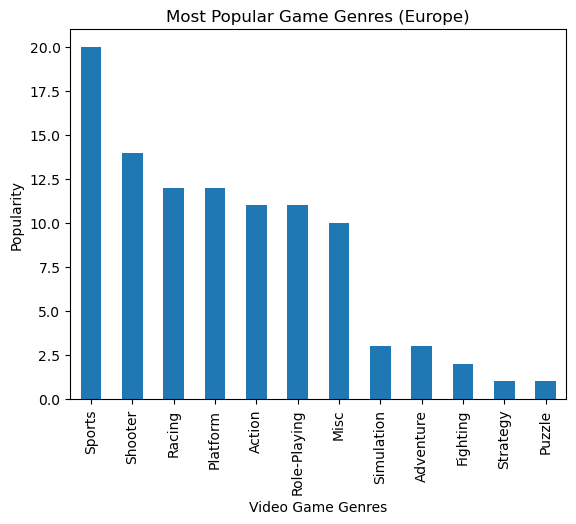

In [140]:
#Europe Genre Popularity
eu = videoGames.sort_values('Europe', ascending = False)

#Cut down values to just the top 100 best selling games in Europe
eu = eu.head(100)

#Plot graph for best selling genres in Europe
eu['Genre'].value_counts().plot(kind='bar', title = 'Most Popular Game Genres (Europe)', xlabel = 'Video Game Genres', ylabel = 'Popularity')

<Axes: title={'center': 'Most Popular Game Genres (Rest of World)'}, xlabel='Video Game Genres', ylabel='Popularity'>

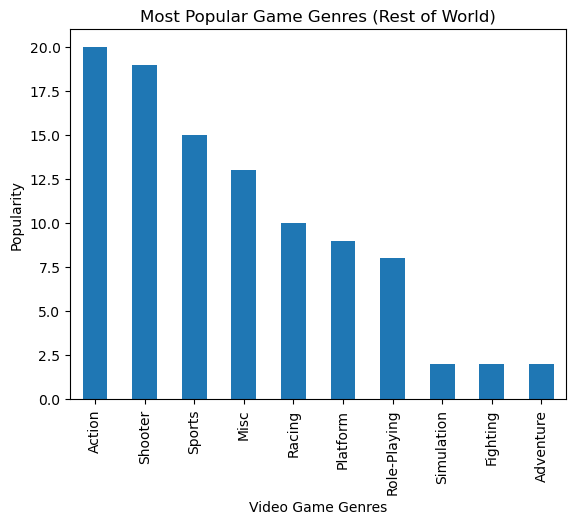

In [141]:
#Rest of World Genre Popularity
row = videoGames.sort_values('Rest of World', ascending = False)

#Cut down values to just the top 100 best selling games in Rest of World
row = row.head(100)

#Plot graph for best selling genres in Rest of World
row['Genre'].value_counts().plot(kind='bar', title = 'Most Popular Game Genres (Rest of World)', xlabel = 'Video Game Genres', ylabel = 'Popularity')

By separating the graphs based on specific regions and limiting the data to just the top 100 best selling games in that region we can see that the popularity for genres changes for each region. In the North America graph it appears that the shooter and platform genres is very popular amongst its gamers which is different from the world wide graph that showed sports and action games being the most popular. Moving on the Japan's graph we see that role-playing games are the most popular by a wide margin. With Europe's graph we see that sports and shooter games are very popular for European gamers. Lastly, the Rest of World graph concludes that action and shooter games are the most popular. By looking at the genre popularity for specific regions video game companies when making a new game will use this data to look at which genre they should cater towards. For example, in Europe video game companies will look to make a sports game as it is the most popluar genre amongst European gamers. Also in Japan, role-playing games are the most popular genre so companies will want to lean towards making Japanese role-playing games.   

Hypothesis Testing and Machine Learning:

Using hypothesis testing and machine learning we will be able to see what aspects of games have the most impact on the total sales it gets and whether the game will be postively or negatively effected by certain things. This will allow game developers to use this to better understand the minds of gamers and what they should truely focus on when creating a new game. 

In [143]:
#Get Columns about platform, genre, year, and review
vg2 = videoGames
vg2['Platform'] = vg2['Platform'].map({'Wii' : 0, 'NES' : 1, 'GB' : 2, 'DS' : 3, 'PS2' : 4, 'SNES' : 5, 'X360' : 6, 'GBA' : 7, 'PS3' : 8,
       'N64' : 9, 'PC' : 10, 'PS' : 11, 'XB' : 12, '3DS' : 13, 'PSP' : 14, 'GC' : 15, 'GEN' : 16, 'DC' : 17, 'SAT' : 18,
       'WiiU' : 19, 'SCD' : 20, 'PSV' : 21})
vg2['Genre'] = vg2['Genre'].map({'Sports' : 0, 'Platform' : 1, 'Racing' : 2, 'Puzzle' : 3, 'Misc' : 4, 'Shooter' : 5,
       'Simulation' : 6, 'Role-Playing' : 7, 'Action' : 8, 'Fighting' : 9, 'Adventure' : 10,
       'Strategy' : 11})
X = vg2.values[:, [2, 3, 4, 11]]
y = vg2.values[:, 10].astype(int)

#Create formula and get the f-statistic
formula = "Global ~ Platform + Year + Genre + Review"
reg = smf.ols(formula=formula, data=vg2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Global   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     34.07
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.70e-27
Time:                        00:38:00   Log-Likelihood:                -5062.6
No. Observations:                1907   AIC:                         1.014e+04
Df Residuals:                    1902   BIC:                         1.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.7037     27.263      2.740      0.006      21.235     128.172
Platform      -0.1484      0.019     -7.656      0.000      -0.186      -0.110
Year          -0.0383      0.014     -2.818      0.005      -0.065      -0.012
Genre         -0.0379      0.024     -1.610      0.107      -0.084       0.008
Review         0.0730      0.008      9.614      0.000       0.058       0.088
==============================================================================
Omnibus:                     2959.303   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1992938.595
Skew:                           9.393   Prob(JB):                         0.00
Kurtosis:                     160.253   Cond. No.                     6.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When looking at the F-statistic we see that the null hypothesis is rejected since the value is exceptionally close to 0. There is a relationship between total sales and things like platforms, years, genres, and reviews.

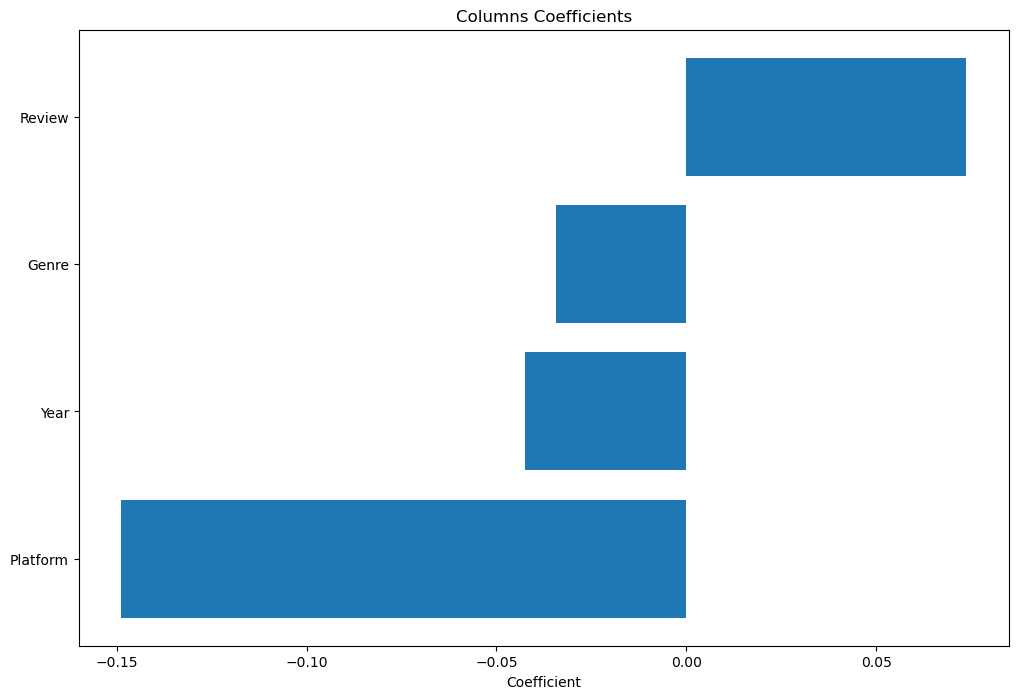

In [149]:
#Create linear regression
reg = LinearRegression().fit(X, y)

plt.figure(figsize=(12, 8))
plt.title('Columns Coefficients')
plt.xlabel('Coefficient')

#Create horizontal bar graph to depict whether each column has a positive impact or negative impact on total sales
plt.barh(y=vg2.columns[[2, 3, 4, 11]], width=reg.coef_)
plt.show()

Looking at the bar graph for the 4 columns that we used for the relationship between total sales we see that getting good reviews on your games played an important part in whether your total sales would increase or decrease. The other three columns appear to hinder the total sales a game got with the platform being a key factor. This makes sense as specific genres, year of the game, and the platform the game is on will play important parts in whether the consumer will buy your game or not and depending on it the total sales could increase or decrease. 

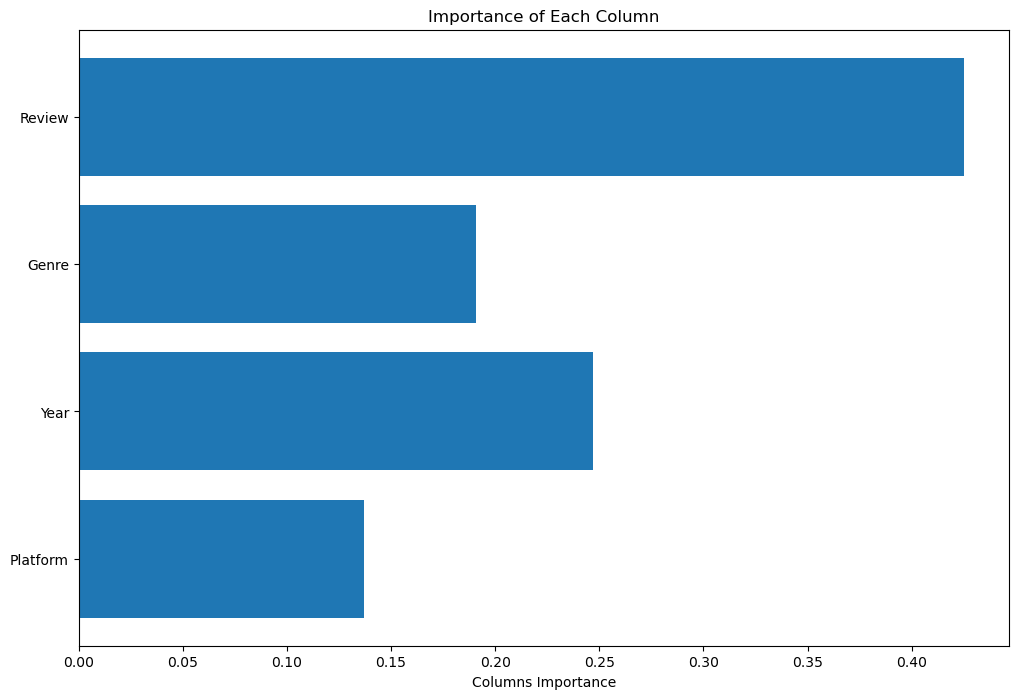

In [150]:
#Create Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, criterion="gini")
clf = clf.fit(X, y)

plt.figure(figsize=(12, 8))
plt.title('Importance of Each Column')
plt.xlabel('Columns Importance')

#Create horizontal bar graph for column importance
plt.barh(y=vg2.columns[[2, 3, 4, 11]], width=clf.feature_importances_)
plt.show()

Judging from the horizontal bar graph we see that the review a game gets has a very important factor on the total sales A game gets with year coming in after and genre and platform respectively. Using this we can conclude that game reviews are a great predictor on whether your game will have great sales numbers or if it will be a flop. 

Final Conclusion:

Based on everything we have done so far we will are able to see that there are many things that go into the success of a video game. Ranging from the platform the game is played on, genre of the game, year the game came out, and the reviews of the game have played a major factor in whether the game sells good or not. As video game company when making a game we saw that there are specifc gaming platforms that are more popular than others depending on the region. For example, we saw that in Japan the Nintendo consoles were the most popular ones. This means that game developers in the Japanese market should explicitly focus on creating a partnership with Nintendo so they can produce games on their products. We also saw that popular game genres were different based on the region. Like with Europe we saw that sports games were the most popular which shows that companies should focus more on games similar to Fifa which soccer is very popular in that region. Then when using machine learning we saw that certain aspects were better predictors than others for predicting game sales. For example, we saw that game reviews played an very important factor in game sales and so game reviews should be taken very seriously for companies who want to maximize their profits.